<a href="https://colab.research.google.com/github/raffaloffredo/do_excel_a_analise_de_dados/blob/main/An%C3%A1lise_de_Dados_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

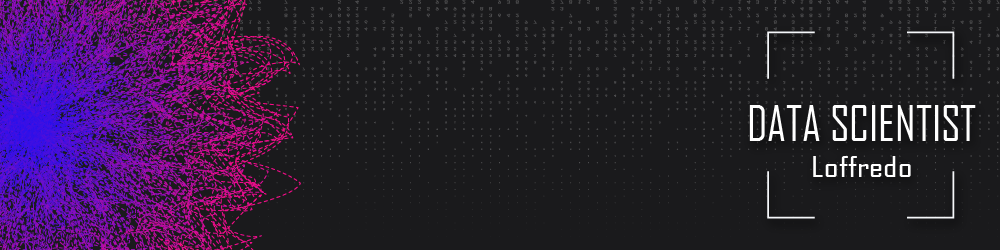

<div>
  <a href = "https://github.com/raffaloffredo/data_science_portfolio"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/raffaela-loffredo/?locale=en_US" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a>
  <a href="https://sites.google.com/view/loffredo/" target="_blank"><img src="	https://img.shields.io/badge/website-000000?style=for-the-badge&logo=About.me&logoColor=white" target="_blank"></a>
  <a href="https://instagram.com/loffredo.ds" target="_blank"><img src="https://img.shields.io/badge/-Instagram-%23E4405F?style=for-the-badge&logo=instagram&logoColor=white" target="_blank"></a>
  <a href="https://medium.com/@loffredo.ds" target="_blank"><img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white"></a>
</div>

# Sobre o projeto

Esse documento faz parte do projeto "Do Excel à Análise de Dados" que tem por objetivo analisar ações de empresa da Bolsa do Brasil - B3 - e da bolsa dos Estados Unidos para mostrar minhas habilidades com o uso de planilhas, criação de fórmulas para se chegar no resultado obtido, desenvolvimento de análises de dados com criação de gráficos e previsão de séries temporais.

Acesse o projeto inteiro [aqui](https://github.com/raffaloffredo/do_excel_a_analise_de_dados).

# Importação dos Dados e das Bibliotecas

Ao iniciar um projeto é necessário instalar pacotes, importar as bibliotecas que possuem funções específicas a serem utilizadas nas linhas de código seguintes e realizar as configurações necessárias para a saída do código. Também, se prossegue com a importação do dataset, salvando-o em uma variável específica, bem como cada aba do Google Sheets, para que sejam usadas posteriormente.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd               # manipulação de dados
import plotly.express as px       # criação de gráficos

import warnings                   # notificações
warnings.filterwarnings('ignore') # configurar notificações para serem ignoradas

# configurar a saída para mostrar todas as linhas e colunas
pd.options.display.max_columns  = None

# configurar a saída para mostar apenas 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

# configurar saída de figuras em formato 'svg' (melhor qualidade)
%config InlineBackend.figure_format = 'svg'

Para o código abaixo funcionar é necessário exportar a [tabela de ações](https://docs.google.com/spreadsheets/d/1xjK3cCBwy22l8hRtdHqtwlkmtKMcYdc-PpjMIuxAN1c/edit#gid=1948288097) desenvolvida no Google Sheets e importar ela no ambiente do Google Colab.

No Google Sheets clique em `Arquivo` > `Fazer download` > `Microsoft Excel (.xlsx)` e salve o arquivo no seu computador.

Aqui, no ambiente do Google Colab, no menu do lado esquerdo clique no último ícone `Arquivos`. Irá abrir uma seção e no menu superior dessa seção, clique no primeiro ícone, que representa um documento com uma seta para cima. Ao clicar nele já irá abrir os arquivos do seu computador. Selecione a a planilha `Tabela de Ações` que você salvou anteriormente.

O arquivo irá carregar e uma vez feito você está pronto para rodar os códigos abaixo!

In [ ]:
# importar os dados da aba Principal e atribuir em uma variável
df_raw = pd.read_excel("/content/tabela_acoes.xlsx", sheet_name="Original")

# checar as 5 primeiras entradas
df_raw.head()

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"


In [ ]:
# importar os dados da aba Total_de_Acoes e atribuir em uma variável
df_total_acoes = pd.read_excel("/content/tabela_acoes.xlsx", sheet_name="Total_de_acoes")

# checar as 5 primeiras entradas
df_total_acoes.head()

,Código,Qtde. Teórica
0,RRRP3,235665566.00
1,ALOS3,532616595.00
2,ALPA4,176733968.00
3,ABEV3,4394245879.00
4,ARZZ3,62305891.00


In [ ]:
# importar os dados da aba Ticker e atribuir em uma variável
df_ticker = pd.read_excel("/content/tabela_acoes.xlsx", sheet_name="Ticker")

# checar as 5 primeiras entradas
df_ticker.head()

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas


In [ ]:
# importar os dados da aba ChatGPT e atribuir em uma variável
df_chatgpt = pd.read_excel("/content/tabela_acoes.xlsx", sheet_name="ChatGPT")

# checar as 5 primeiras entradas
df_chatgpt.head()

,Nome,Segmento,Idade (Anos)
0,Usiminas,Indústria / Metalurgia,60.00
1,CSN Mineração,Mineração,30.00
2,Petrobras,Energia / Petróleo,70.00
3,Suzano,Papel e Celulose,100.00
4,CPFL Energia,Energia,100.00


# Limpeza e Processamento dos Dados

Aqui será feita a limpeza e o processamentos dos dados para prepará-los para a realização das análises. Para isso foram feitos as seguintes etapas:

1. cópia do dataset `df_raw` apenas com as colunas `Ativo`, `Data`, `Último (R$)` e `Var. Dia (%)`, denominado `df_principal` que será utilizado apenas ele daqui por diante para manter o original intacto.

2. renomeação de colunas para que não contenham espaços e facilite a leitura pelo Python, bem como evitar possíveis erros.

3. criação da coluna `Var_percentual_dia` que contém o valor numérico do percentual da coluna `Var_dia_pct`.

4. criação da coluna `Abertura`, que corresponde à coluna `Preço Inicial (R$)`no Google Sheets e que traz o preço da ação no início do pregão.

5. união das planilhas `df_principal` e `df_total_acoes` para trazer a informação da quantidade de ações por ativo.

6. criação da coluna `Vol_financeiro_dia`, que corresponde à coluna `Vol. R$ Diário` no Google Sheets e que traz o volume financeiro total movimentado no dia.

7. verificação dos tipos de dados e alterações cabíveis para o tipo

In [ ]:
# fazer uma cópia do dataset df_principal mas apenas das colunas especificadas
df_principal = df_raw[['Ativo', 'Data', 'Último (R$)', 'Var. Dia (%)']].copy()

# checar alterações
df_principal.head()

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03


In [ ]:
# renomear colunas que contem espaço
df_principal = df_principal.rename(columns={'Último (R$)' : 'Fechamento', 'Var. Dia (%)' : 'Var_dia_pct'}).copy()

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03


In [ ]:
# criar coluna Var_percentual_dia que conterá o valor numérico do percentual da coluna Var_dia_pct
df_principal['Var_percentual_dia'] = df_principal['Var_dia_pct'] / 100

# criar coluna Abertura que conterá o preço de abertura da ação
df_principal['Abertura'] = df_principal['Fechamento'] / (1 + df_principal['Var_percentual_dia'])

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36


In [ ]:
# unir planilhas a partir da coluna com ticket do ativo
df_principal = df_principal.merge(df_total_acoes, left_on='Ativo', right_on='Código', how='left')

# remover coluna Código para não ficar duplicado
df_principal = df_principal.drop(columns=['Código'])

# renomear coluna Qtdade. Teórica para Qtdade_acoes
df_principal = df_principal.rename(columns={'Qtde. Teórica' : 'Qtdade_acoes'}).copy()

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00


In [ ]:
# criar coluna Vol_financeiro_dia que conterá o volume financeiro total movimentado no dia
df_principal['Vol_financeiro_dia'] = (df_principal['Fechamento'] - df_principal['Abertura']) * df_principal['Qtdade_acoes']

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes,Vol_financeiro_dia
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06


In [ ]:
# verificar tamanho do data frame
print('Dimensões do conjunto de dados')
print('-' * 30)
print('Total de registros:\t {}'.format(df_principal.shape[0]))
print('Total de atributos:\t {}'.format(df_principal.shape[1]))

Dimensões do conjunto de dados
------------------------------
Total de registros:	 81
Total de atributos:	 8


In [ ]:
# gerar informações do data frame e verificar tipo dos dados
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ativo               81 non-null     object        
 1   Data                81 non-null     datetime64[ns]
 2   Fechamento          81 non-null     float64       
 3   Var_dia_pct         81 non-null     float64       
 4   Var_percentual_dia  81 non-null     float64       
 5   Abertura            81 non-null     float64       
 6   Qtdade_acoes        81 non-null     float64       
 7   Vol_financeiro_dia  81 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 5.7+ KB


In [ ]:
# alterar tipo da coluna Qtdade_acoes para inteiro
df_principal['Qtdade_acoes'] = df_principal['Qtdade_acoes'].astype(int)

# verificar alteração
df_principal['Qtdade_acoes'].dtypes

dtype('int64')

In [ ]:
# criar coluna Resultado para informar se a ação subiu ou desceu no dia
df_principal['Resultado'] = df_principal['Vol_financeiro_dia'].apply(lambda x: 'Subiu' if x > 0 else ('Desceu' if x < 0 else 'não houve variação'))

# verificar alteração
df_principal

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes,Vol_financeiro_dia,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu


In [ ]:
# unir planilhas a partir da coluna com ticket do ativo
df_principal = df_principal.merge(df_ticker, left_on='Ativo', right_on='Ticker', how='left')

# remover coluna Ticker para não ficar duplicado
df_principal = df_principal.drop(columns=['Ticker'])

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes,Vol_financeiro_dia,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia


In [ ]:
# unir planilhas a partir da coluna com o nome do ativo
df_principal = df_principal.merge(df_chatgpt, left_on='Nome', right_on='Nome', how='left')

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes,Vol_financeiro_dia,Resultado,Nome,Segmento,Idade (Anos)
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Indústria / Metalurgia,60.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,30.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia / Petróleo,70.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,100.00


In [ ]:
# renomear coluna Idade (Anos) para Idade
df_principal = df_principal.rename(columns={'Idade (Anos)' : 'Idade'}).copy()

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes,Vol_financeiro_dia,Resultado,Nome,Segmento,Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Indústria / Metalurgia,60.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,30.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia / Petróleo,70.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,100.00


In [ ]:
# criar faixas de idade das empresas
## maior que 100 anos
## entre 50 e 100 anos
## menor que 50
df_principal['Faixa_idade'] = df_principal['Idade'].apply(lambda x: 'Mais de 100 anos' if x > 100 else ('Menos de 50 anos' if x < 50 else 'Entre 50 e 100 anos'))

# checar alterações
df_principal.head()

,Ativo,Data,Fechamento,Var_dia_pct,Var_percentual_dia,Abertura,Qtdade_acoes,Vol_financeiro_dia,Resultado,Nome,Segmento,Idade,Faixa_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Indústria / Metalurgia,60.00,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,30.00,Menos de 50 anos
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia / Petróleo,70.00,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100.00,Entre 50 e 100 anos
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,100.00,Entre 50 e 100 anos


# Análise de Dados

Com os dados limpos e devidamente processados, podemos analisá-los para obter informações.

## Maior, menor e média de variação em volume financeiro (R$)

Vamos identificar de forma fácil qual foi a maior e a menor variação em volume financeiro (R$) que ocorreu no dia (e quais empresas são essas), bem como o valor médio.

Além disso, o valor da média como calculado acima pode não trazer a melhor informação quando queremos saber qual a média da variação em volume financeiro das empresas que subiram e das que desceram.

In [ ]:
# variação: maior, menor e média
maior = df_principal['Vol_financeiro_dia'].max()
menor = df_principal['Vol_financeiro_dia'].min()
media = df_principal['Vol_financeiro_dia'].mean()

# identificar empresas
maior_empresa = df_principal.loc[df_principal['Vol_financeiro_dia'] == maior, 'Nome']
menor_empresa = df_principal.loc[df_principal['Vol_financeiro_dia'] == menor, 'Nome']

# média de variação das empresas que só subiram e das que só desceram
media_subiu = df_principal[df_principal['Resultado'] == 'Subiu']['Vol_financeiro_dia'].mean()
media_desceu= df_principal[df_principal['Resultado'] == 'Desceu']['Vol_financeiro_dia'].mean()

print('Variação Financeira (R$)')
print('-' * 30)
print('Maior:\t R$ {:.2f} - {}\n'
      'Menor:\t R$ {:.2f} - {}\n\n'
      'Média de Variação R$ {:.2f}\n\n'
      'Média de Variação SUBIU  R$ {:.2f}\n'
      'Média de Variação DESCEU R$ {:.2f}'.format(maior, maior_empresa.iloc[0], menor, menor_empresa.iloc[0], media, media_subiu, media_desceu))

Variação Financeira (R$)
------------------------------
Maior:	 R$ 4762926995.25 - Vale
Menor:	 R$ -1807432634.46 - Localiza

Média de Variação R$ 154547114.74

Média de Variação SUBIU  R$ 448164250.23
Média de Variação DESCEU R$ -186265310.46


## Análise por Segmento

Nessa análise, foi reunida as informações por segmento para uma análise mais específica. Para isso vou criar dois novos data frames:

* `df_segmento_tudo`: para conter todos os dados apenas agrupados por segmento

* `df_segmento_subiu`: para conter apenas dados das ações que subiram no dia, agrupado por segmento

Ao final, farei um merge desses data frames para ficar visualmente mais fácil comparar os dados.

In [ ]:
# criar df_segmento_tudo com dados agrupados por segmento
df_segmento_tudo = df_principal.groupby('Segmento')['Vol_financeiro_dia'].sum().reset_index()

# visualizar o data frame
df_segmento_tudo

,Segmento,Vol_financeiro_dia
0,Agronegócio,-9468663.68
1,Agronegócio / Açúcar e Etanol,-79432785.74
2,Alimentos,233045769.57
3,Alimentos / Carnes,174787913.53
4,Alimentos e Bebidas,0.00
5,Construção / Materiais,18068446.61
6,Construção Civil,37525872.38
7,Educação,54641872.47
8,Energia,-547428350.07
9,Energia / Agronegócio,127229653.18


In [ ]:
# criar df_segmento_subiu com dados agrupados por segmento
df_segmento_subiu = df_principal[df_principal['Resultado'] == 'Subiu']
df_segmento_subiu = df_segmento_subiu.groupby('Segmento')['Vol_financeiro_dia'].sum().reset_index()

# renomar coluna Vol_financeiro_dia
df_segmento_subiu = df_segmento_subiu.rename(columns={'Vol_financeiro_dia' : 'Vol_financeiro_dia_subiu'}).copy()

# visualizar o data frame
df_segmento_subiu

,Segmento,Vol_financeiro_dia_subiu
0,Alimentos,233045769.57
1,Alimentos / Carnes,174787913.53
2,Construção / Materiais,18068446.61
3,Construção Civil,37525872.38
4,Educação,72295838.99
5,Energia,682315640.01
6,Energia / Agronegócio,127229653.18
7,Energia / Biocombustíveis,11571106.42
8,Energia / Distribuição,388705223.96
9,Energia / Petróleo,6093288832.26


In [ ]:
# unir planilhas a partir da coluna Segmento
df_segmento = df_segmento_tudo.merge(df_segmento_subiu, left_on='Segmento', right_on='Segmento', how='left')

# checar alterações
df_segmento

,Segmento,Vol_financeiro_dia,Vol_financeiro_dia_subiu
0,Agronegócio,-9468663.68,NaN
1,Agronegócio / Açúcar e Etanol,-79432785.74,NaN
2,Alimentos,233045769.57,233045769.57
3,Alimentos / Carnes,174787913.53,174787913.53
4,Alimentos e Bebidas,0.00,NaN
5,Construção / Materiais,18068446.61,18068446.61
6,Construção Civil,37525872.38,37525872.38
7,Educação,54641872.47,72295838.99
8,Energia,-547428350.07,682315640.01
9,Energia / Agronegócio,127229653.18,127229653.18


## Saldo

Com as informações do quanto as ações subiram e o quanto elas desceram, é possível saber o valor de saldo somando-os.

In [ ]:
# criar df_saldo que irá agregar as informações
df_saldo = df_principal.groupby('Resultado')['Vol_financeiro_dia'].sum().reset_index()

# visualizar df_saldo
df_saldo

,Resultado,Vol_financeiro_dia
0,Desceu,-6891816486.99
1,Subiu,19719227010.14
2,não houve variação,0.00


# Gráficos

In [ ]:
# criar gráfico de barras
fig = px.bar(df_saldo, x='Resultado', y='Vol_financeiro_dia', text='Vol_financeiro_dia', title='Volume financeiro diário por Resultado', labels={'Vol_financeiro_dia': 'Volume Financeiro Diário'})

# configurar formatação do eixo y para formato de moeda
fig.update_layout(yaxis_tickprefix='R$', yaxis_tickformat=',.2f')

# mostrar o valor nas barras com o formato de moeda
for trace in fig.data:
    trace.text = ['R$' + '{:,.2f}'.format(x) for x in trace.text]

# mostar figure
fig.show()

In [ ]:
# criar gráfico pizza por volume financeiro de acordo com o segmento
fig = px.pie(df_segmento_tudo, names='Segmento', values='Vol_financeiro_dia', title='Volume Financeiro em R$ por Segmento')

# mostar figure
fig.show()

In [ ]:
# criar data frame com dados agrupados por Faixa de idade
df_faixa_idade = df_principal.groupby('Faixa_idade')['Vol_financeiro_dia'].sum().reset_index()

# criar gráfico de barras
fig = px.bar(df_faixa_idade, x='Faixa_idade', y='Vol_financeiro_dia', text='Vol_financeiro_dia', title='Volume Financeiro em R$ por Faixa de Idade', labels={'Vol_financeiro_dia': 'Volume Financeiro Diário'})

# configurar formatação do eixo y para formato de moeda
fig.update_layout(yaxis_tickprefix='R$', yaxis_tickformat=',.2f')

# mostrar o valor nas barras com o formato de moeda
for trace in fig.data:
    trace.text = ['R$' + '{:,.2f}'.format(x) for x in trace.text]

# mostar figure
fig.show()



---

